<h2>Data Cleaning and Analysis Workflow</h2>

<ul>
    <li><b>Data Cleaning:</b></li>
    <ul>
        <li>Filters data within the range of 2013-2024.</li>
        <li>Handles missing values using forward-fill and interpolation techniques.</li>
        <li>Excludes stock prices that fall outside valid S&P 500 membership periods or IPO dates.</li>
    </ul>

    <li><b>S&P 500 Membership Adjustments:</b></li>
    <ul>
        <li>Aligns stock data with the periods of S&P 500 membership and IPO dates.</li>
        <li>Filters out data for non-member stocks or pre-IPO periods.</li>
    </ul>

    <li><b>Outlier Detection and Smoothing:</b></li>
    <ul>
        <li>Identifies anomalies using Z-scores and Median Absolute Deviation (MAD).</li>
        <li>Applies smoothing techniques to reduce the impact of outliers.</li>
    </ul>

    <li><b>Statistical Analysis:</b></li>
    <ul>
        <li>Computes key metrics such as mean, variance, and cumulative returns.</li>
        <li>Provides sector-based statistics and risk-adjusted metrics like Sharpe Ratios.</li>
    </ul>

    <li><b>Visualization:</b></li>
    <ul>
        <li>Generates insights with stock price trend analysis.</li>
        <li>Displays mean and variance distributions.</li>
        <li>Highlights cumulative returns with IPO dates marked.</li>
    </ul>
</ul>


In [1]:
try:
    import yfinance as yf
except ImportError:
    raise ImportError("Cannot start without 'yfinance' package.\nInstall it before running the code again.")
import bs4 as bs
import numpy as np
import pandas as pd
import os
import requests
from datetime import datetime
from pandas.core.frame import DataFrame

In [2]:

table=pd.read_html('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df0=table[0]
print(df0)
df0.to_csv("SNP500_Data.csv", index=False)
SP500_column = df0[["Symbol","Date added"]] 

df1=table[1]
# Combine the first and second row into a single row of headers
df1.columns = ['Date', 'Added_Ticker', 'Added_Security', 'Removed_Ticker', 'Removed_Security', 'Reason']

# Optionally, remove the first two rows if they were part of the original data
df1 = df1.iloc[2:]  # Adjust this if the first two rows are just headers

# Save to CSV
df1.to_csv("SNP500_Data_Change.csv", index=False)
# add_column = df1.iloc[1:, 1]
# delete_column = df1.iloc[1:, 3]

# first column is 'Time'，second column is 'Name'
new_df = df1.iloc[:, [1, 2]]

new_df

    Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
497    XYL           Xylem Inc.             Industrials   
498    YUM          Yum! Brands  Consumer Discretionary   
499   ZBRA   Zebra Technologies  Information Technology   
500    ZBH        Zimmer Biomet             Health Care   
501    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North 

,Added_Ticker,Added_Security
2,PLTR,Palantir Technologies
3,DELL,Dell Technologies
4,ERIE,Erie Indemnity
5,KKR,KKR
6,CRWD,CrowdStrike
...,...,...
348,WLP,Wellpoint
349,FSR,Firstar
350,CCL,Carnival Corp.
351,CPWR,Compuware


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm  
from IPython.display import clear_output  

# define the stock list
# stock_list = ["NVDA", "AMZN", "GOOG", "AAPL", "TSLA"]
stock_list = df0["Symbol"].tolist()
# initialize an empty DataFrame to store the stock data
stock_matrix = pd.DataFrame()

# set the date range for downloading stock data
start_date = "2013-01-01"
end_date = "2024-10-30"

# loop through the stock list and download the data
for symbol in tqdm(stock_list, desc="Downloading stock data"):
    ticker_symbol = symbol

    # download the stock data using yfinance
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    # check if the data is empty
    if data.empty:
        clear_output(wait=True)
        print(f"No data for {ticker_symbol}, skipping...")
        continue

#     # extract the closing prices
#     closing_prices = data['Close']
#     stock_matrix[ticker_symbol] = closing_prices  # add the closing prices to the stock matrix

#     # get the closing prices
#     clear_output(wait=True)
#     print(f"Downloaded data for {ticker_symbol}")

# # print the number of stocks downloaded
# print(f"Collected data for {stock_matrix.shape[1]} stocks.")

data


No data for MDT, skipping...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  2.09it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  2.38it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  2.67it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  3.13it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  3.30it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  3.14it/s]
[*********************100%*****

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS
Date,,,,,,
2013-02-01 00:00:00+00:00,28.409883,31.010000,31.740000,30.469999,31.500000,66789100
2013-02-04 00:00:00+00:00,28.419041,31.020000,31.990000,30.760000,31.090000,7695400
2013-02-05 00:00:00+00:00,28.437366,31.040001,31.980000,30.850000,31.250000,5013200
2013-02-06 00:00:00+00:00,28.428200,31.030001,31.430000,30.750000,30.980000,2126100
2013-02-07 00:00:00+00:00,29.316877,32.000000,32.730000,31.000000,31.000000,3800800
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,188.543228,188.990005,189.979996,187.559998,189.399994,1339500
2024-10-24 00:00:00+00:00,181.070923,181.500000,188.250000,180.059998,187.559998,4485900


In [33]:
# data.to_excel("Stock_Closing_Prices.xlsx", index=True)
import os
print(os.getcwd())  # This shows the current working directory
data.to_excel("/Users/wendyxin/Stock_Closing_Prices_1.xlsx", index=True)

/Users/wendyxin


In [6]:
data = pd.read_excel('Stock_Closing_Prices_1.xlsx')
# data.reset_index = True
data

,Unnamed: 0,Date,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
0,0,2013-01-02,79.25,16.15,32.05,35.12,69.06,38.34,2.53,11.00,...,29.15,34.03,90.75,118.07,27.38,27.50,48.28,40.96,65.73,NaN
1,1,2013-01-03,79.16,15.90,33.27,34.83,68.81,37.75,2.49,10.94,...,29.15,33.77,91.68,119.34,27.30,27.41,48.58,41.00,66.67,NaN
2,2,2013-01-04,79.74,16.07,33.07,34.39,69.19,38.13,2.59,11.20,...,29.39,34.14,91.66,120.78,27.40,27.37,49.12,40.67,67.01,NaN
3,3,2013-01-07,79.84,15.90,33.34,34.46,68.89,37.94,2.67,10.85,...,29.48,33.99,91.39,121.19,27.11,27.01,48.81,40.90,67.17,NaN
4,4,2013-01-08,79.85,16.20,33.35,33.71,69.29,38.14,2.67,10.85,...,29.68,33.57,90.94,121.09,27.16,26.68,46.76,40.93,67.27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,2972,2024-10-23,127.91,77.30,117.01,187.88,370.63,485.03,152.91,17.08,...,31.85,52.25,291.92,97.68,64.32,131.72,134.02,368.09,104.70,188.99
2973,2973,2024-10-24,126.47,77.34,116.54,189.65,364.23,482.87,153.44,16.98,...,32.13,52.62,290.53,97.90,65.11,130.65,133.16,362.05,104.00,181.50
2974,2974,2024-10-25,124.75,76.87,114.22,187.85,360.80,483.72,156.23,16.96,...,31.80,52.50,290.45,97.99,64.46,130.42,133.04,360.09,102.35,180.01
2975,2975,2024-10-28,130.29,77.00,114.07,189.68,361.32,481.04,159.92,17.05,...,31.95,52.29,292.12,98.62,64.48,130.79,134.86,363.58,103.60,182.76


In [20]:
# we have 500 stocks now,but it is not the final version, as there are some 'holdings' meaning that stock that 
# are previously included in the S&P 500 stocks but maybe later pulled out of the pool, and no longer considered for the 
# S&P 500 stocks anymore.
# These data are still helpful in dealing with historical testing and backtesting etc. And it should be include as the final version of 
# data collecting
# maybe yahoo finance does not give you this information, need to go to bloomberg to try to find out these holdings and try to add them into 
# the stocks and S&P 500 data. 

In [43]:
# # Step 1: Identify and Remove Pre-IPO Data
# # Check for columns (stocks) where the data starts after a certain date (IPO date)

# # For each stock, find the first non-NaN date (i.e., the IPO date)
# ipo_dates = data.apply(lambda col: col.first_valid_index())

# # Create a mask to filter out rows (dates) before the IPO for each stock
# for ticker in data.columns:
#     ipo_date = ipo_dates[ticker]
#     # Set values before IPO date to NaN
#     data.loc[:ipo_date, ticker] = np.nan

# # Step 2: Continue with the remaining cleaning process (fill forward/backward or drop NaNs)
# # For instance, we can drop all rows where every column has NaNs
# data.dropna(how='all', inplace=True)

# # Alternatively, if you want to forward-fill missing data after the IPO (to smooth the series)
# data.fillna(method='ffill', inplace=True)

# # Proceed with the return calculation and analysis as before
# returns = data.pct_change().dropna()

# # Recalculate cumulative returns, detect outliers, and visualize


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming your DataFrame is named 'data' and has a 'Date' column
# Step 1: Data Cleaning
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Forward-fill missing values to avoid breaks in time series analysis
data.fillna(method='ffill', inplace=True)

# Calculate daily returns for each stock
returns = data.pct_change().dropna()  # Drop first row with NaN returns

# Step 2: Basic Statistics
# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Calculate mean and standard deviation for each stock's returns
mean_returns = returns.mean()
std_dev_returns = returns.std()

# Step 3: Outlier Detection using Z-scores
# Filter out stocks with extreme z-scores
z_scores = np.abs(stats.zscore(returns, axis=0))  # Z-scores across columns
threshold = 3  # Threshold for outlier detection

# Create a clean returns DataFrame excluding extreme outliers
returns_clean = returns[(z_scores < threshold).all(axis=1)]

# Step 4: Top Stock Selection
# Calculate cumulative returns for cleaned data
cumulative_returns_clean = (1 + returns_clean).cumprod()

# Select the top 20 stocks based on cumulative returns at the end of the period
top_20_stocks = cumulative_returns_clean.iloc[-1].nlargest(20).index
top_20_data = cumulative_returns_clean[top_20_stocks]

# Step 5: Visualization
# plt.figure(figsize=(12, 6))
# for ticker in top_20_stocks:
#     plt.plot(cumulative_returns_clean.index, cumulative_returns_clean[ticker], label=ticker)
# plt.title('Cumulative Returns of Top 20 Performing Stocks (2020-2024)')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Return')
# plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)
# plt.grid(True)
# plt.show()

# Print summary statistics
print("Top 20 Stocks by Cumulative Returns (Cleaned):")
print(top_20_data.iloc[-1])

print("\nBasic Statistics for All Stocks (Mean and Std Dev):")
print(pd.DataFrame({'Mean Return': mean_returns, 'Std Dev': std_dev_returns}))


Top 20 Stocks by Cumulative Returns (Cleaned):
VST     1.087936
HUM     1.084391
LULU    1.071369
CVS     1.067168
APA     1.066166
MOS     1.063203
WYNN    1.059606
DAY     1.057427
WBA     1.053129
ADBE    1.048686
DVN     1.048648
LVS     1.045821
EG      1.044961
PHM     1.041919
BK      1.040725
ON      1.039877
CRWD    1.039559
XOM     1.039541
BKR     1.039449
GPN     1.038885
Name: 2024-10-14 00:00:00, dtype: float64

Basic Statistics for All Stocks (Mean and Std Dev):
            Mean Return       Std Dev
Unnamed: 0     0.000337  8.383172e-07
MMM           -0.002288  1.420527e-02
AOS           -0.004466  1.830052e-02
ABT            0.000068  9.826290e-03
ABBV          -0.000809  8.948924e-03
...                 ...           ...
XYL           -0.000921  8.735414e-03
YUM            0.000103  1.053377e-02
ZBRA           0.002275  1.525436e-02
ZBH           -0.001429  1.069021e-02
ZTS           -0.002566  1.292303e-02

[502 rows x 2 columns]


/var/folders/53/3dgl_7fj1698ktgl5dpl_zgw0000gn/T/ipykernel_11726/65141683.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


IPO Start Dates for Each Stock:
     IPO Start Date
MMM      2013-01-02
AOS      2013-01-02
ABT      2013-01-02
ABBV     2013-01-02
ACN      2013-01-02
...             ...
XYL      2013-01-02
YUM      2013-01-02
ZBRA     2013-01-02
ZBH      2013-01-02
ZTS      2013-02-01

[501 rows x 1 columns]


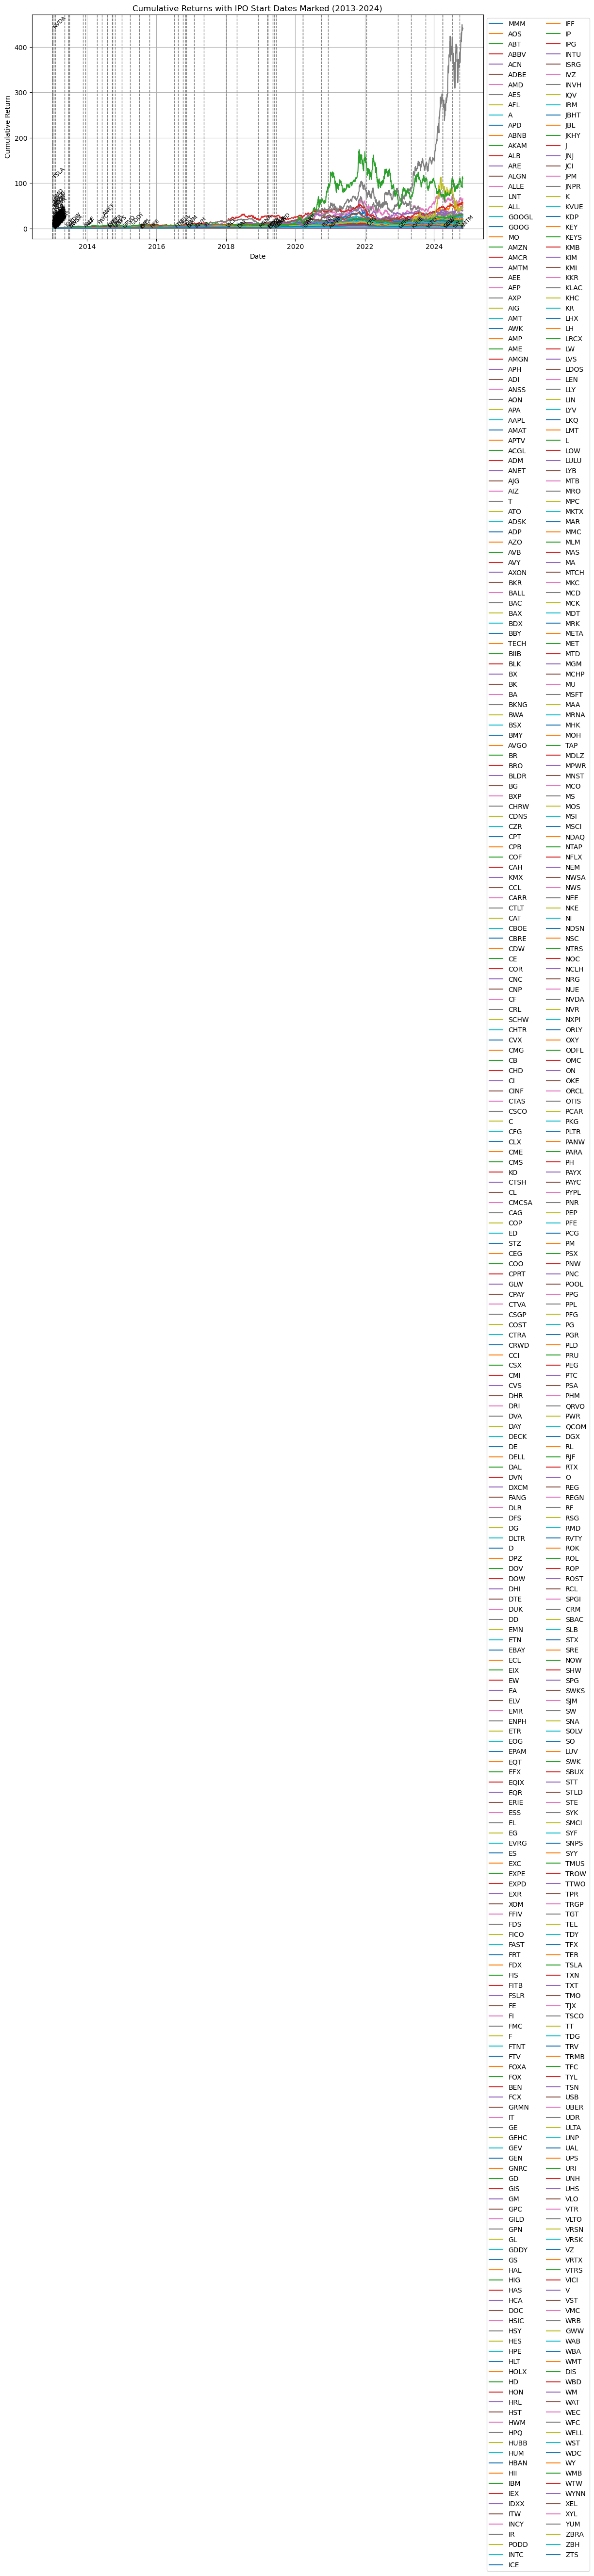

In [16]:
import matplotlib.pyplot as plt

# Step 1: Identify IPO Dates (First Non-NaN Data)
ipo_dates = data.apply(lambda col: col.first_valid_index())

# Step 2: Add a column to show IPO dates (optional for tracking in the table)
ipo_dates_df = pd.DataFrame(ipo_dates, columns=['IPO Start Date'])
print("IPO Start Dates for Each Stock:")
print(ipo_dates_df)

# Step 3: Continue with data cleaning (but without dropping or forward filling missing data)
# Calculate daily returns for stocks (ignoring NaNs naturally due to pct_change)
returns = data.pct_change()

# Step 4: Calculate Cumulative Returns for the available data
cumulative_returns = (1 + returns).cumprod()

# Step 5: Visualization with IPO Start Indicators
plt.figure(figsize=(12, 6))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
    
    # Mark IPO start date on the plot (with a vertical line or marker)
    ipo_start = ipo_dates[ticker]
    if pd.notna(ipo_start):
        plt.axvline(x=ipo_start, color='gray', linestyle='--', lw=1)
        plt.text(ipo_start, cumulative_returns[ticker].iloc[-1], ticker, rotation=45, fontsize=8)

plt.title('Cumulative Returns with IPO Start Dates Marked (2013-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)
plt.grid(True)
plt.show()


/var/folders/53/3dgl_7fj1698ktgl5dpl_zgw0000gn/T/ipykernel_46291/651309785.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


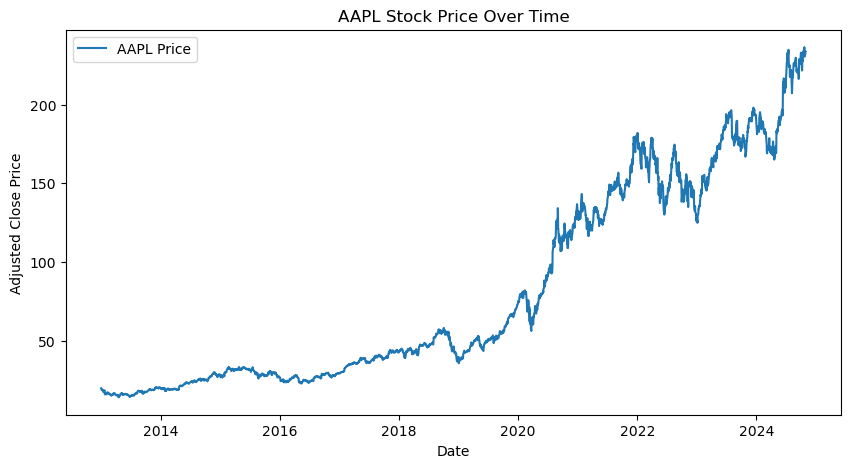

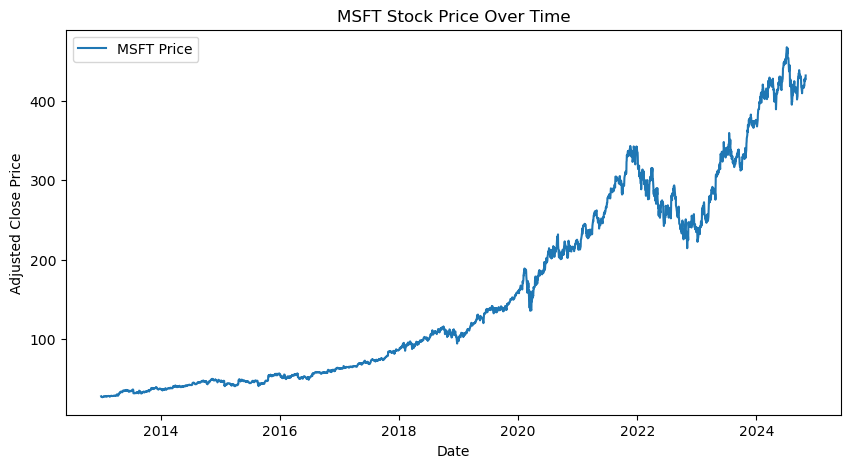

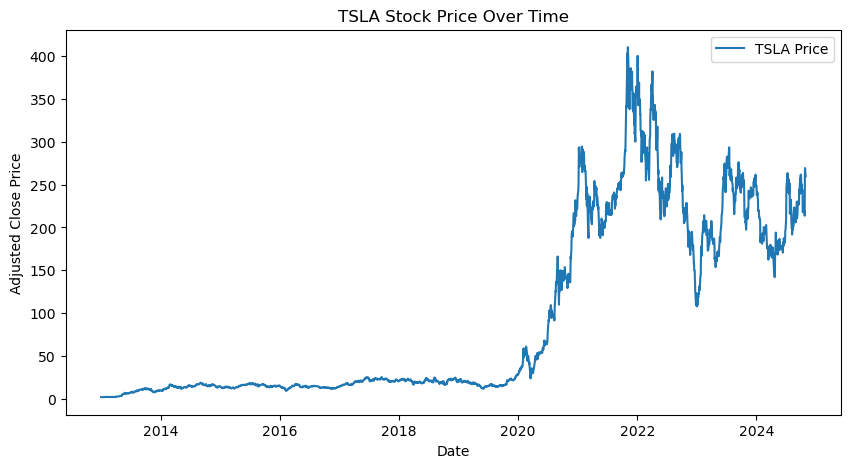

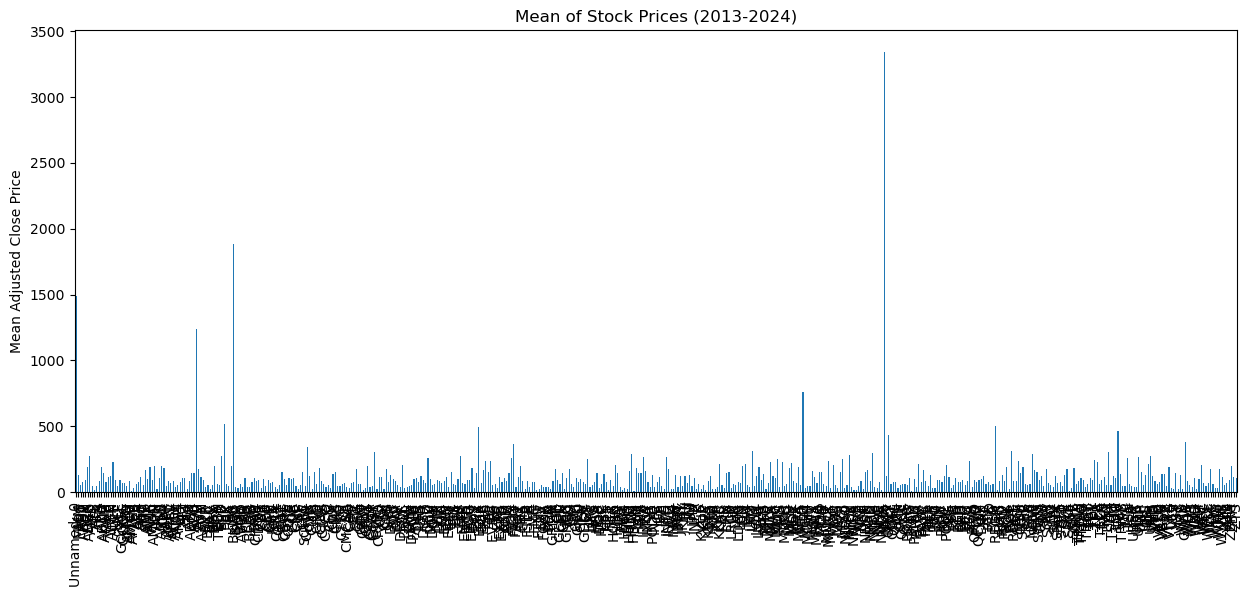

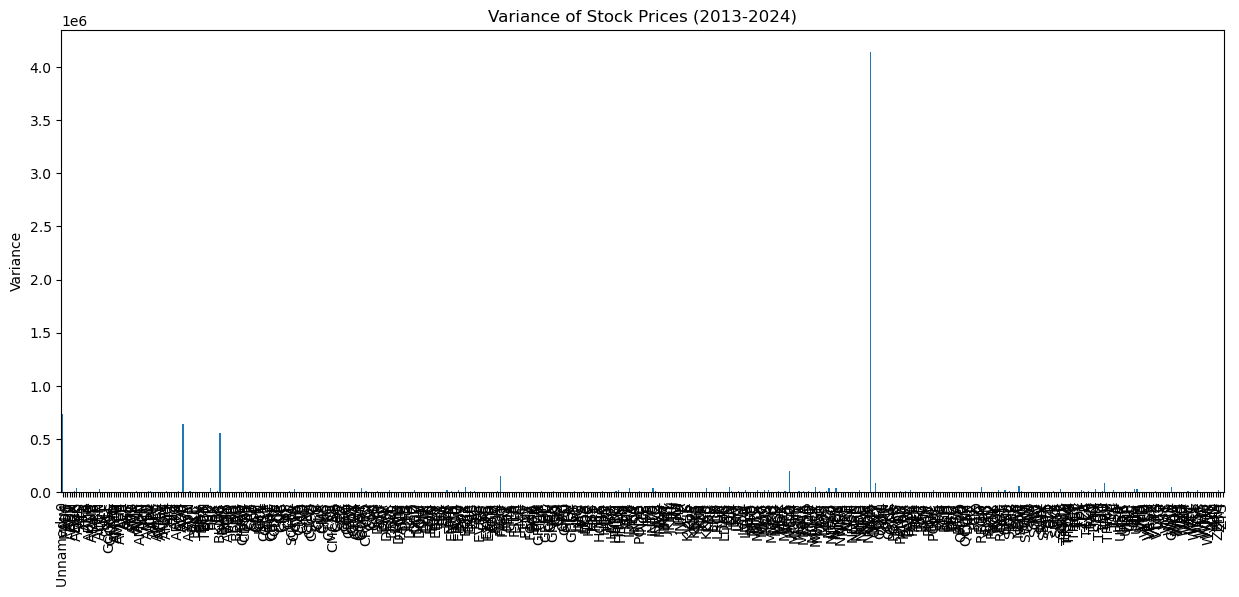

In [11]:
data['Date'] = pd.to_datetime(data['Date'])
data = data[(data['Date'] >= '2013-01-01') & (data['Date'] <= '2024-12-31')]

# Drop columns with all NaN values (stocks that entered the S&P 500 after 2024)
data = data.dropna(how='all', axis=1)

# Forward-fill and back-fill missing values to handle days without recorded data
data = data.fillna(method='ffill').fillna(method='bfill')

# Step 2: Calculate Mean and Variance for Each Stock
# Exclude the 'Date' column for calculations
stock_data = data.drop(columns=['Date'])
means = stock_data.mean()
variances = stock_data.var()

# Step 3: Visualization
# Line plot of selected stocks over time (e.g., AAPL, MSFT, AMZN)
selected_stocks = ['AAPL', 'MSFT', 'TSLA']  # Replace with actual stock tickers in your dataset
for stock in selected_stocks:
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data[stock], label=f'{stock} Price')
    plt.title(f'{stock} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

# Bar chart of mean and variance for each stock
plt.figure(figsize=(15, 6))
means.plot(kind='bar', title='Mean of Stock Prices (2013-2024)')
plt.ylabel('Mean Adjusted Close Price')
plt.show()

plt.figure(figsize=(15, 6))
variances.plot(kind='bar', title='Variance of Stock Prices (2013-2024)')
plt.ylabel('Variance')
plt.show()

#how to deal with the pinpoint(very high ones), obvious, spikes can influence the overall performance of testing and analysis 

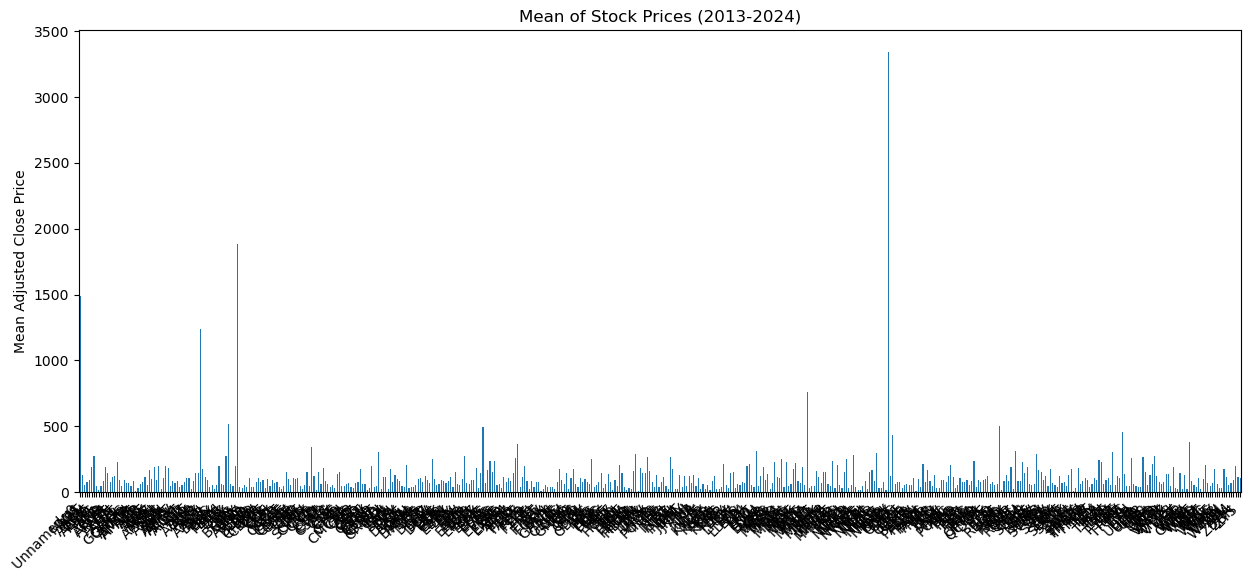

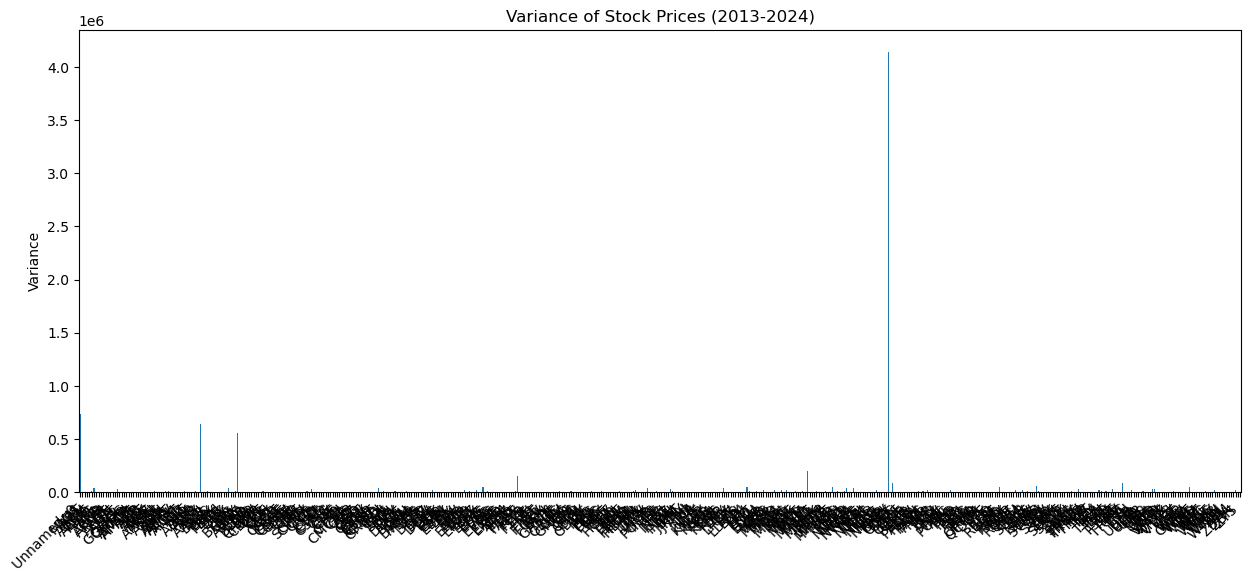

In [15]:
# Bar chart of mean stock prices with rotated x-axis labels
plt.figure(figsize=(15, 6))
means.plot(kind='bar', title='Mean of Stock Prices (2013-2024)')
plt.ylabel('Mean Adjusted Close Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

# Bar chart of variance with rotated x-axis labels
plt.figure(figsize=(15, 6))
variances.plot(kind='bar', title='Variance of Stock Prices (2013-2024)')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()


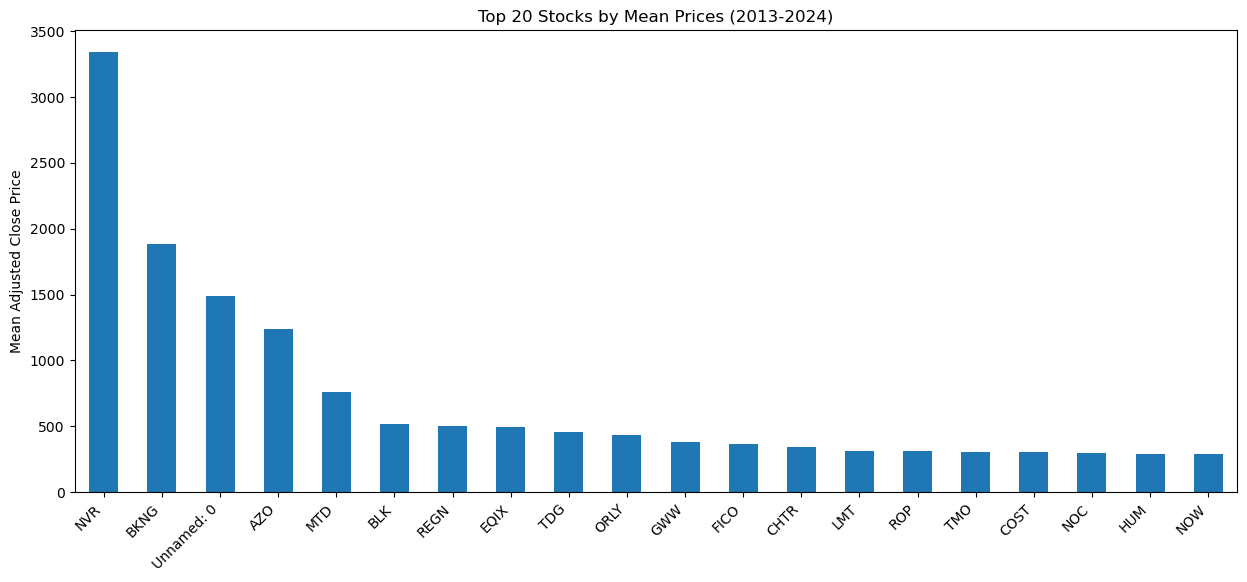

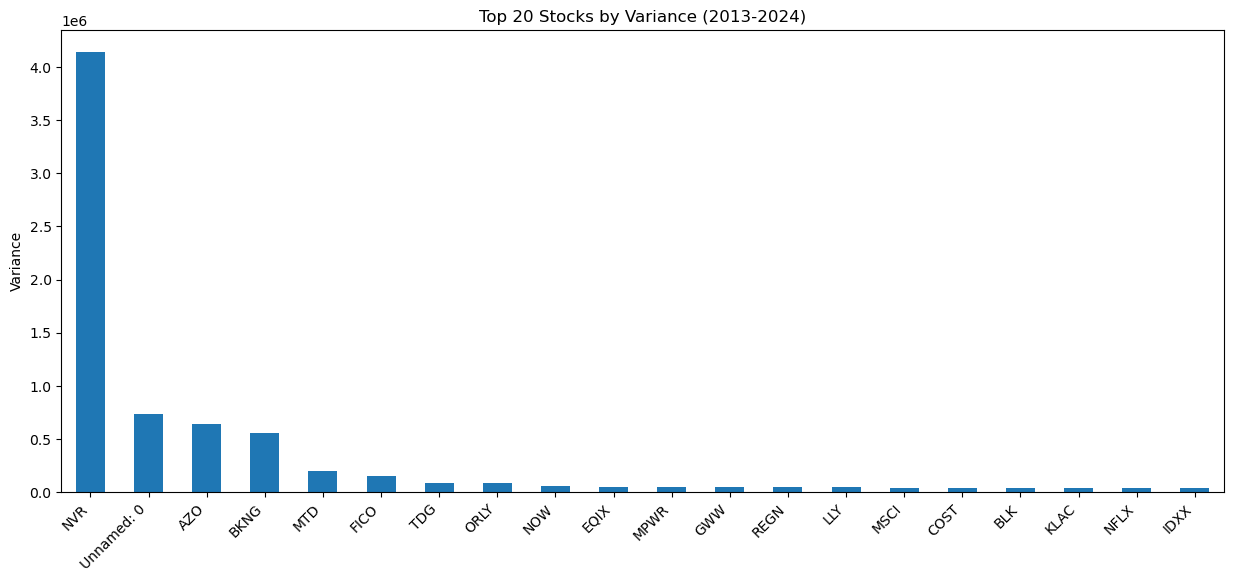

In [17]:
# Display top 20 stocks by mean prices
top_20_means = means.nlargest(20)
plt.figure(figsize=(15, 6))
top_20_means.plot(kind='bar', title='Top 20 Stocks by Mean Prices (2013-2024)')
plt.ylabel('Mean Adjusted Close Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

# Display top 20 stocks by variance
top_20_variances = variances.nlargest(20)
plt.figure(figsize=(15, 6))
top_20_variances.plot(kind='bar', title='Top 20 Stocks by Variance (2013-2024)')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()


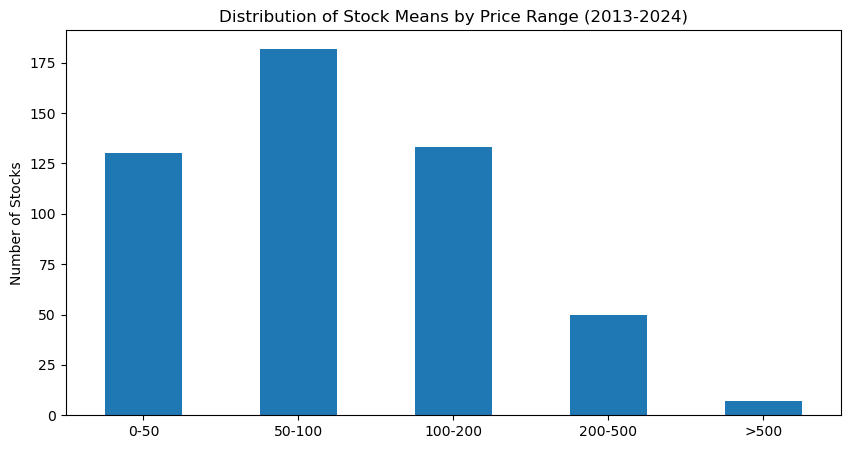

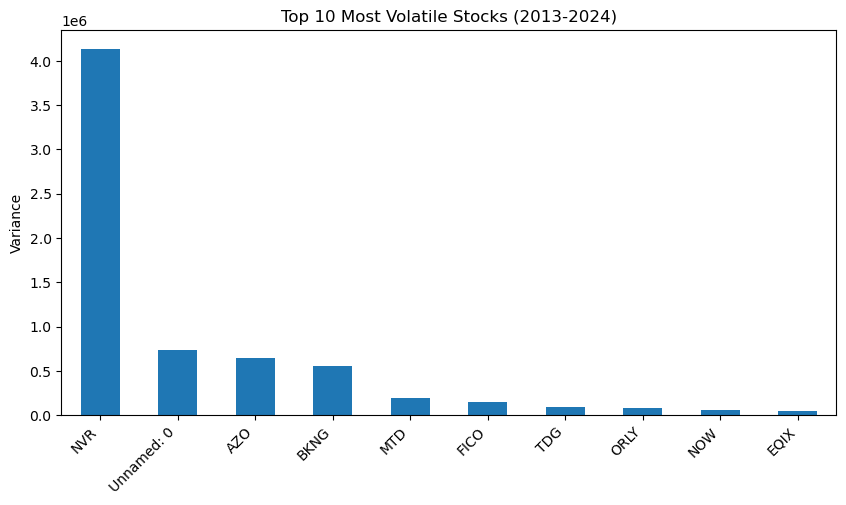

In [21]:
# Group stocks by mean price ranges
bins = [0, 50, 100, 200, 500, means.max()]
bin_labels = ['0-50', '50-100', '100-200', '200-500', '>500']
mean_bins = pd.cut(means, bins=bins, labels=bin_labels)

# Plot counts of stocks in each range
mean_bin_counts = mean_bins.value_counts(sort=False)
plt.figure(figsize=(10, 5))
mean_bin_counts.plot(kind='bar', title='Distribution of Stock Means by Price Range (2013-2024)')
plt.ylabel('Number of Stocks')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()
# Highlight top 10 most volatile stocks by variance
top_10_volatility = variances.nlargest(10)
plt.figure(figsize=(10, 5))
top_10_volatility.plot(kind='bar', title='Top 10 Most Volatile Stocks (2013-2024)')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.show()


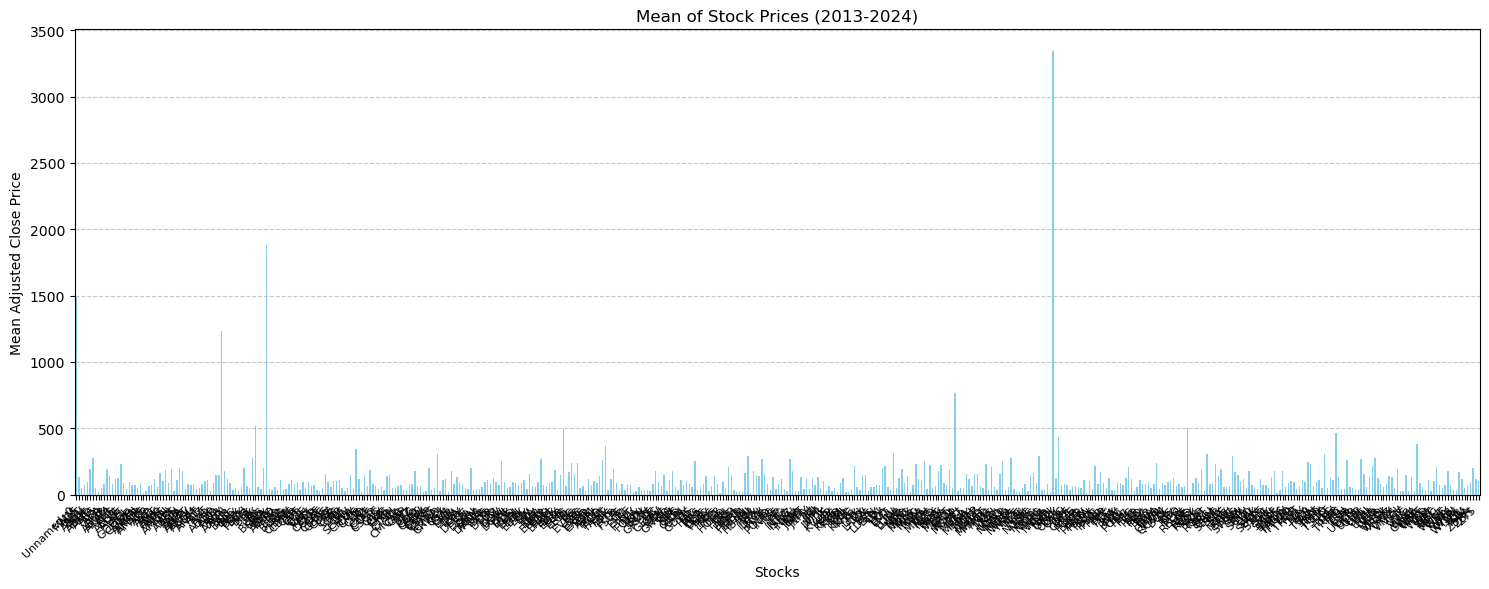

In [23]:
# Example of enhanced visualization
plt.figure(figsize=(15, 6))
means.plot(kind='bar', title='Mean of Stock Prices (2013-2024)', color='skyblue')
plt.ylabel('Mean Adjusted Close Price')
plt.xlabel('Stocks')
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [46]:
  # Assuming `data` is the cleaned DataFrame
#data.to_excel('Cleaned_Stock_Closing_Prices.xlsx', index=False)
data.to_csv('/Users/wendyxin/Cleaned_Stock_Closing_Prices.csv', index=False, encoding='utf-8')

In [15]:
from scipy import stats

# Identify and remove outliers based on Z-score (e.g., Z > 3)
z_scores = np.abs(stats.zscore(data, nan_policy='omit'))
outliers = z_scores > 3
data[outliers] = np.nan

# Interpolate to fill gaps caused by outlier replacement
data = data.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')
data


/var/folders/53/3dgl_7fj1698ktgl5dpl_zgw0000gn/T/ipykernel_11726/179816251.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')


,Unnamed: 0,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0,79.25,16.15,32.05,35.12,69.06,38.34,2.53,11.00,27.03,...,29.15,34.03,90.75,118.07,27.38,27.50,48.28,40.96,65.73,31.01
2013-01-03,1,79.16,15.90,33.27,34.83,68.81,37.75,2.49,10.94,26.35,...,29.15,33.77,91.68,119.34,27.30,27.41,48.58,41.00,66.67,31.01
2013-01-04,2,79.74,16.07,33.07,34.39,69.19,38.13,2.59,11.20,26.02,...,29.39,34.14,91.66,120.78,27.40,27.37,49.12,40.67,67.01,31.01
2013-01-07,3,79.84,15.90,33.34,34.46,68.89,37.94,2.67,10.85,25.92,...,29.48,33.99,91.39,121.19,27.11,27.01,48.81,40.90,67.17,31.01
2013-01-08,4,79.85,16.20,33.35,33.71,69.29,38.14,2.67,10.85,26.22,...,29.68,33.57,90.94,121.09,27.16,26.68,46.76,40.93,67.27,31.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23,2972,127.91,77.30,117.01,187.88,370.63,485.03,152.91,17.08,101.19,...,31.85,52.25,291.92,97.68,64.32,131.72,134.02,368.09,104.70,188.99
2024-10-24,2973,126.47,77.34,116.54,189.65,364.23,482.87,153.44,16.98,101.19,...,32.13,52.62,290.53,97.90,65.11,130.65,133.16,362.05,104.00,181.50
2024-10-25,2974,124.75,76.87,114.22,187.85,360.80,483.72,156.23,16.96,101.19,...,31.80,52.50,290.45,97.99,64.46,130.42,133.04,360.09,102.35,180.01


In [33]:
# Apply a rolling mean to reduce the impact of spikes
rolling_data = data.rolling(window=5, min_periods=1).mean()

#Winsorize values within each stock to limit extreme values
from scipy.stats.mstats import winsorize

# Apply winsorization to limit extreme values for each stock
winsorized_data = data.apply(lambda x: winsorize(x, limits=[0.01, 0.01]))
winsorized_data

,Unnamed: 0,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,29,79.25,17.34,33.50,37.20,72.12,38.62,2.53,11.00,27.03,...,29.15,34.03,97.17,118.07,27.49,27.50,48.28,43.65,71.78,31.01
2013-01-03,29,79.16,17.34,33.50,37.20,72.12,38.62,2.49,10.94,26.35,...,29.15,33.77,97.17,119.34,27.49,27.41,48.58,43.65,71.78,31.01
2013-01-04,29,79.74,17.34,33.50,37.20,72.12,38.62,2.59,11.20,26.02,...,29.39,34.14,97.17,120.78,27.49,27.37,49.12,43.65,71.78,31.01
2013-01-07,29,79.84,17.34,33.50,37.20,72.12,38.62,2.67,10.85,25.92,...,29.48,33.99,97.17,121.19,27.49,27.01,48.81,43.65,71.78,31.01
2013-01-08,29,79.85,17.34,33.50,37.20,72.12,38.62,2.67,10.85,26.22,...,29.68,33.57,97.17,121.09,27.49,26.68,46.94,43.65,71.78,31.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23,2947,127.91,77.30,117.01,187.88,370.63,485.03,152.91,17.08,101.19,...,31.85,52.25,290.59,97.68,64.32,131.72,134.02,368.09,104.70,188.99
2024-10-24,2947,126.47,77.34,116.54,189.65,364.23,482.87,153.44,16.98,101.19,...,32.13,52.62,290.53,97.90,65.11,130.65,133.16,362.05,104.00,181.50
2024-10-25,2947,124.75,76.87,114.22,187.85,360.80,483.72,156.23,16.96,101.19,...,31.80,52.50,290.45,97.99,64.46,130.42,133.04,360.09,102.35,180.01


In [39]:
# Recalculate mean and variance after smoothing
means = data.mean()
variances = data.var()
means
variances

Unnamed: 0    738792.166667
MMM              909.856899
AOS              338.939433
ABT             1001.236692
ABBV            1647.610309
                  ...      
XYL             1056.047309
YUM              923.240308
ZBRA           20408.213971
ZBH              378.010362
ZTS             3697.152003
Length: 502, dtype: float64

In [81]:
from scipy import stats
import numpy as np

# Calculate Z-scores across each column (for each stock)
z_scores = np.abs(stats.zscore(data, nan_policy='omit'))

# Define the threshold for outliers
threshold = 3

# Replace outliers with NaN if their Z-score is above the threshold
data_cleaned = data.mask(z_scores > threshold)

# Interpolate missing values caused by outliers
data_cleaned = data_cleaned.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')

# Apply a rolling average to smooth out spikes
stock_data_smoothed = data.rolling(window=5, min_periods=1).mean()

from scipy.stats.mstats import winsorize

# Apply winsorization to limit extreme values for each stock
data_winsorized = data.apply(lambda x: winsorize(x, limits=[0.01, 0.01]))

# Calculate median and IQR
medians = data.median()
iqr = data.quantile(0.75) - data.quantile(0.25)

# Recalculate mean and variance after outlier treatment
means_cleaned = data_cleaned.mean()
variances_cleaned = data_cleaned.var()


/var/folders/53/3dgl_7fj1698ktgl5dpl_zgw0000gn/T/ipykernel_11726/1756976163.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned = data_cleaned.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')


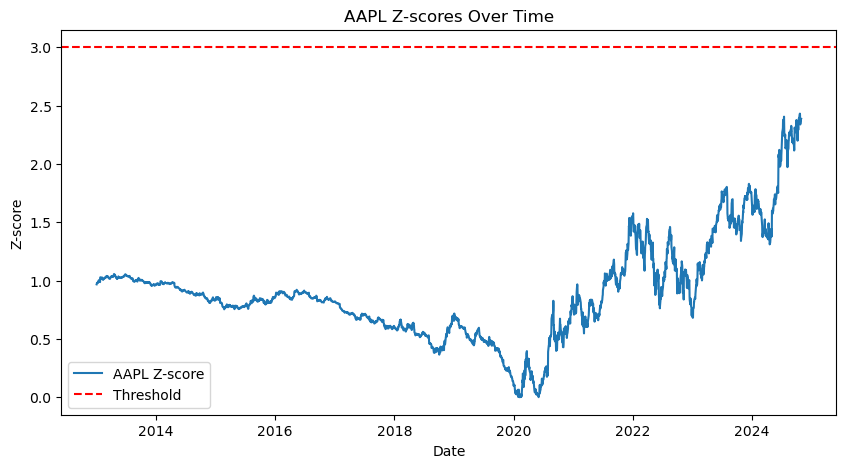

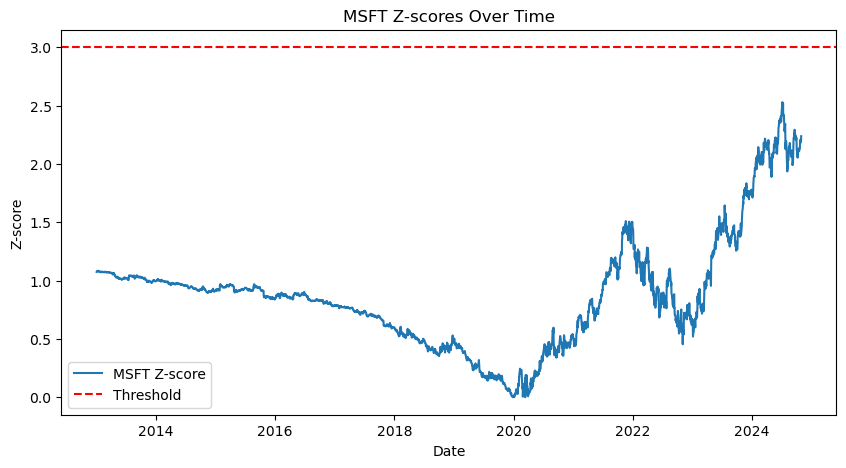

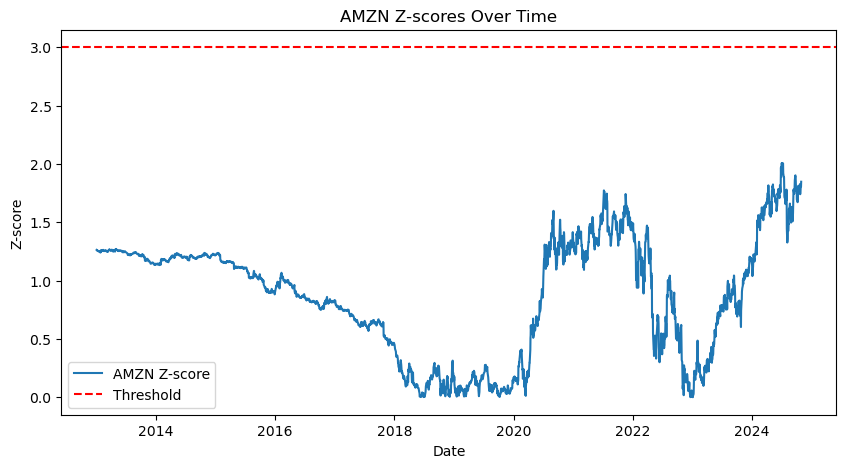

In [99]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Define the threshold for Z-score outliers
threshold = 3  # You can adjust this as needed

# Calculate Z-scores for each stock and plot them
selected_stocks = ['AAPL', 'MSFT', 'AMZN']  # Example stocks

for stock in selected_stocks:
    # Calculate Z-scores for the selected stock column
    stock_z_scores = np.abs(stats.zscore(data[stock].dropna()))
    
    # Align Z-scores with dates (drop the same rows in date index)
    stock_dates = data[stock].dropna().index

    # Plot the Z-scores
    plt.figure(figsize=(10, 5))
    plt.plot(stock_dates, stock_z_scores, label=f'{stock} Z-score')
    plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
    plt.title(f'{stock} Z-scores Over Time')
    plt.xlabel('Date')
    plt.ylabel('Z-score')
    plt.legend()
    plt.show()


/var/folders/53/3dgl_7fj1698ktgl5dpl_zgw0000gn/T/ipykernel_11726/3148692308.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data_cleaned = stock_data_cleaned.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')


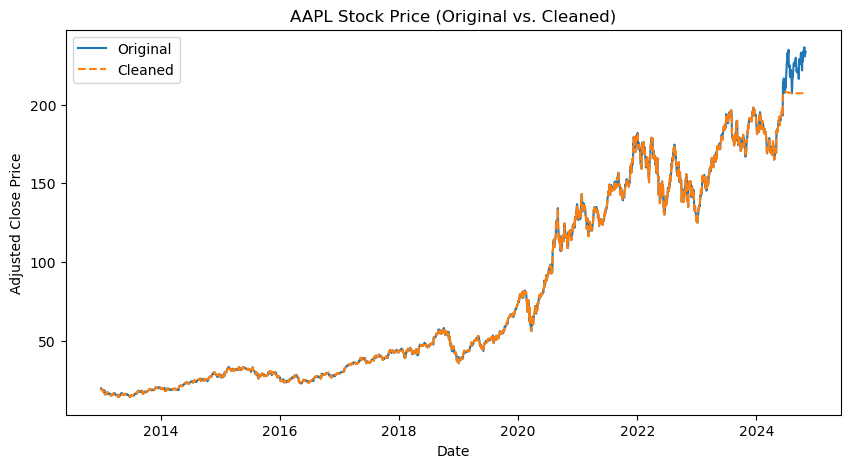

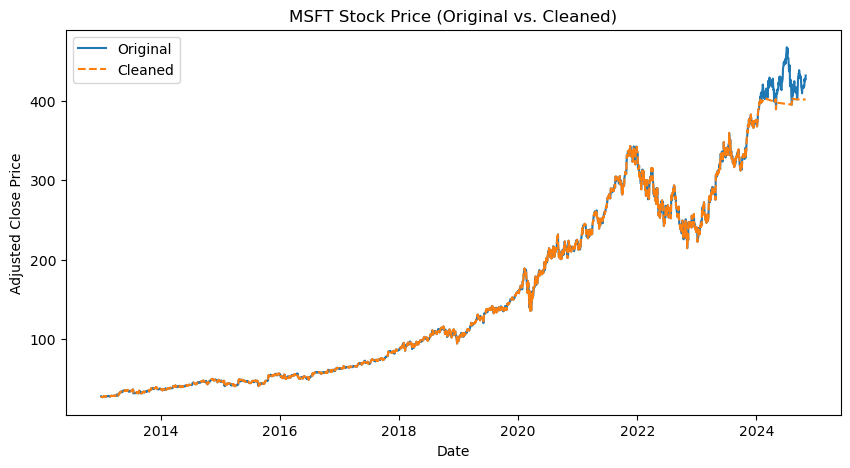

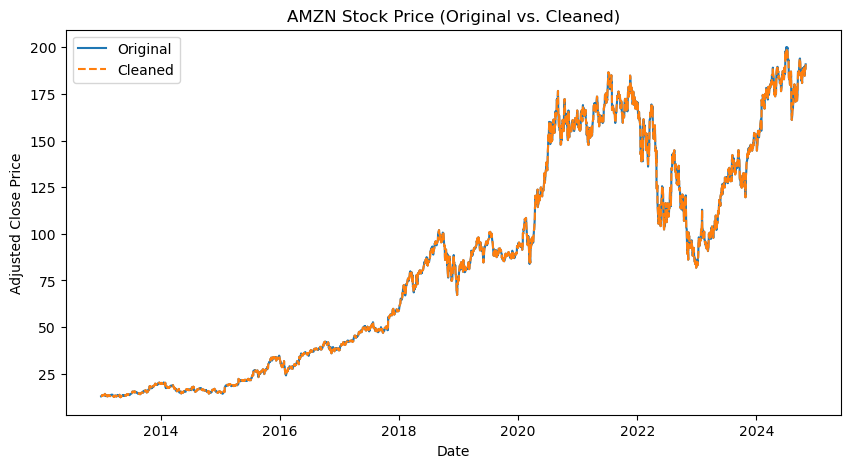

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load the original data and ensure 'Date' is a datetime type
original_data = pd.read_excel('Stock_Closing_Prices_1.xlsx')
original_data['Date'] = pd.to_datetime(original_data['Date'])

# Set 'Date' as the index for original_data
original_data.set_index('Date', inplace=True)

# Make a copy of the original data for cleaning purposes
stock_data = original_data.copy()

# Step 1: Outlier Detection and Cleaning (e.g., using Z-scores)
z_scores = np.abs(stats.zscore(stock_data, nan_policy='omit'))
threshold = 2  # Outlier threshold
stock_data_cleaned = stock_data.mask(z_scores > threshold)

# Fill missing values created by outlier removal
stock_data_cleaned = stock_data_cleaned.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')

# Plot Original vs. Cleaned Data for selected stocks
selected_stocks = ['AAPL', 'MSFT', 'AMZN']  # Replace with actual stock tickers in your dataset
for stock in selected_stocks:
    plt.figure(figsize=(10, 5))
    plt.plot(original_data.index, original_data[stock], label='Original')
    plt.plot(stock_data_cleaned.index, stock_data_cleaned[stock], label='Cleaned', linestyle='--')
    plt.title(f'{stock} Stock Price (Original vs. Cleaned)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()


In [65]:
# # Step 8: Select top-performing stocks
# # Assuming we are using the cumulative returns data from the cleaned dataset
# # Let's select the top 50 based on cumulative returns at the end of the period

# if len(cumulative_returns) > 0:
#     top_stocks = cumulative_returns.nlargest(1 if len(cumulative_returns) < 50 else 50).index
#     top_stocks_data = cumulative_returns[top_stocks]
# else:
#     top_stocks_data = pd.Series()

# print("\nTop Stocks by Cumulative Returns:")
# print(top_stocks_data)

# # Optional: Plot the cumulative returns of the top-performing stocks
# if len(top_stocks_data) > 0:
#     plt.figure(figsize=(10, 6))
#     plt.plot(top_stocks_data.index, cumulative_returns[top_stocks], label='Top Stocks Cumulative Returns')
#     plt.title('Top Stocks by Cumulative Returns')
#     plt.xlabel('Date')
#     plt.ylabel('Cumulative Returns')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


In [67]:
# import numpy as np
# import pandas as pd
# from scipy import stats

# # Step 1: Calculate daily returns
# data['Returns'] = data['Adj Close'].pct_change()

# # Step 2: Handle missing data by removing rows with NaN values
# data.dropna(inplace=True)

# # Step 3: Calculate cumulative returns for the stock
# # Since it's a single ticker ('ZTS'), we can directly calculate cumulative returns
# cumulative_returns = (1 + data['Returns']).cumprod()

# # Step 4: Calculate basic statistics for the stock
# mean_return = data['Returns'].mean()
# std_dev = data['Returns'].std()

# # Step 5: Detect and remove outliers using Z-scores
# # Calculate Z-scores for the returns
# z_scores = np.abs(stats.zscore(data['Returns']))

# # Ensure the z_scores series aligns with the data index
# data_clean = data[z_scores < 3]  # Remove outliers with z-scores greater than 3

# # Step 6: Display the clean data and statistics
# print("Cleaned Data (Outliers Removed):")
# print(data_clean)

# print("\nBasic Statistics:")
# print(f"Mean Return: {mean_return}")
# print(f"Standard Deviation of Returns: {std_dev}")

# # Step 7: Plot cumulative returns after removing outliers
# cumulative_returns_clean = (1 + data_clean['Returns']).cumprod()

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(data_clean.index, cumulative_returns_clean, label='Cumulative Returns (Cleaned)')
# plt.title('Cumulative Returns of ZTS (After Removing Outliers)')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Returns')
# plt.legend(loc="upper left")
# plt.grid(True)
# plt.show()
